In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =  pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)#we are using this as there are missing values in the total_bedroom so we are equalizing by removing the missing amount from all the other variables with the help of the dropna and inplace = true helps them to keep in place

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [11]:
train_data = X_train.join(y_train)#we have joined the x_train and y_train
z = train_data.drop(['ocean_proximity'],axis = 1)
z

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10549,-117.77,33.70,4.0,2446.0,622.0,1315.0,560.0,3.7147,137500.0
1167,-121.56,39.51,46.0,1885.0,385.0,871.0,347.0,1.6352,53100.0
7998,-118.16,33.85,36.0,1979.0,339.0,952.0,339.0,4.0815,216200.0
14178,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0
6564,-118.13,34.19,43.0,1621.0,365.0,1015.0,329.0,2.9200,242200.0
...,...,...,...,...,...,...,...,...,...
16860,-122.43,37.63,15.0,2748.0,997.0,1447.0,901.0,3.5214,144200.0
13391,-117.59,34.09,16.0,2401.0,465.0,1757.0,500.0,3.9755,120400.0
12108,-117.31,33.97,28.0,3420.0,691.0,1502.0,656.0,3.4896,140300.0
12134,-117.16,33.92,12.0,3236.0,502.0,1610.0,502.0,4.7568,143500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

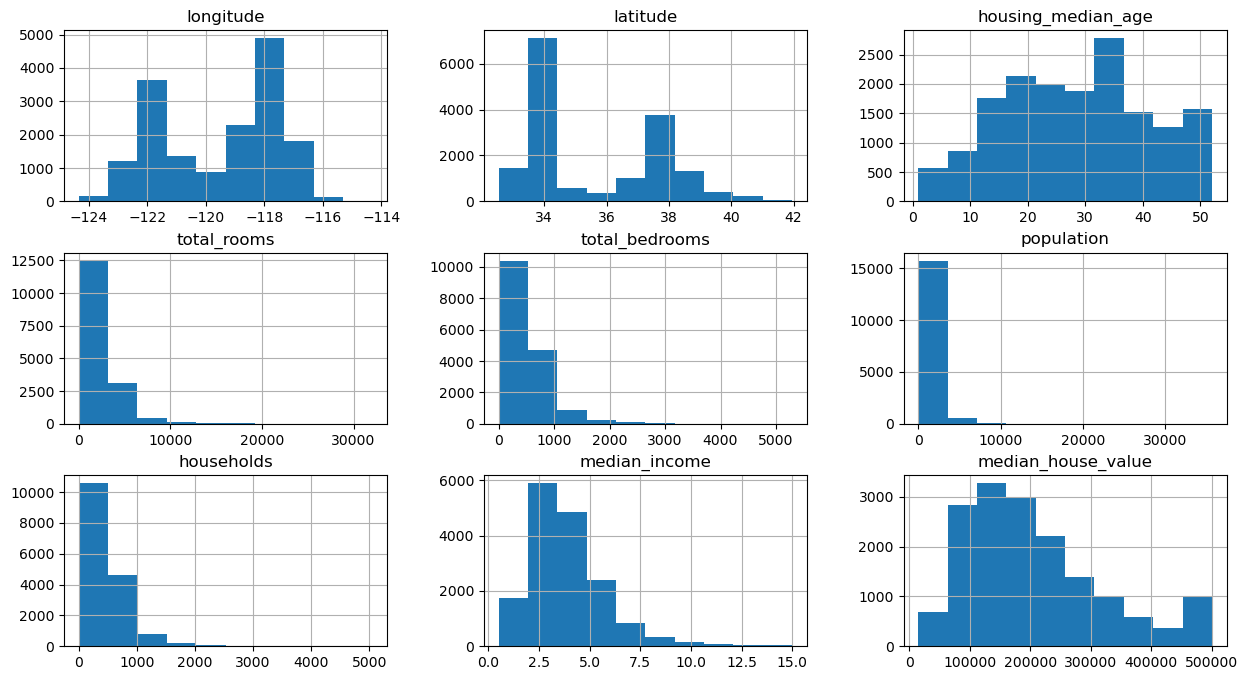

In [12]:
train_data.hist(figsize=(15,8))#hist gives us the train_data in the form of a histogram

In [13]:
z.corr()#A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924889,-0.107407,0.045009,0.069017,0.100293,0.056198,-0.021009,-0.050172
latitude,-0.924889,1.000000,0.012025,-0.037669,-0.067736,-0.109752,-0.072739,-0.074671,-0.139584
housing_median_age,-0.107407,0.012025,1.000000,-0.363467,-0.323816,-0.298188,-0.306330,-0.116460,0.109956
total_rooms,0.045009,-0.037669,-0.363467,1.000000,0.929946,0.854839,0.918453,0.203617,0.137216
total_bedrooms,0.069017,-0.067736,-0.323816,0.929946,1.000000,0.876012,0.979857,-0.003410,0.051234
population,0.100293,-0.109752,-0.298188,0.854839,0.876012,1.000000,0.906100,0.008927,-0.025311
households,0.056198,-0.072739,-0.306330,0.918453,0.979857,0.906100,1.000000,0.018188,0.066805
median_income,-0.021009,-0.074671,-0.116460,0.203617,-0.003410,0.008927,0.018188,1.000000,0.690266
median_house_value,-0.050172,-0.139584,0.109956,0.137216,0.051234,-0.025311,0.066805,0.690266,1.000000


<Axes: >

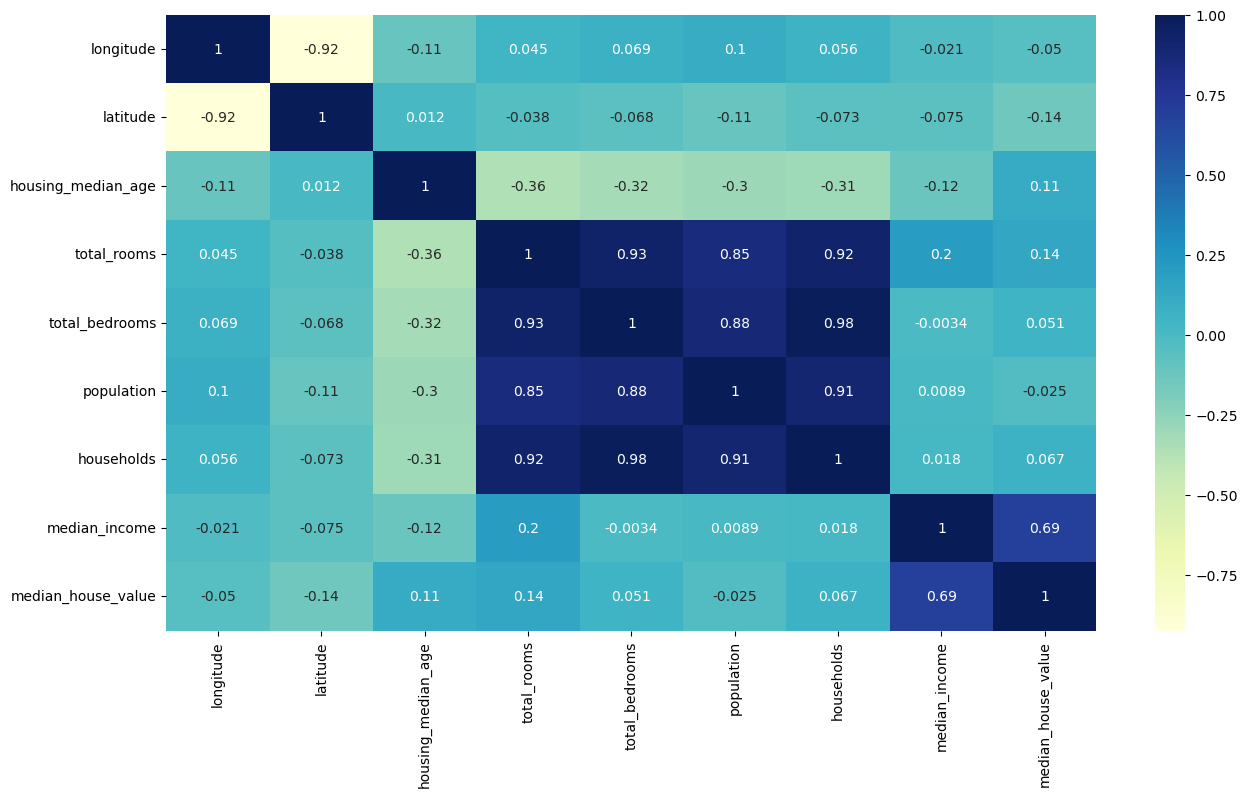

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(z.corr() , annot=True , cmap= "YlGnBu" )

In [15]:
#we are taking the log of the feature variables which are either right skewed or left skewed in order to bring them into a normal distribution form , and 1 is added to each of them if in case the variable was zero
train_data['total_rooms'] = np.log(train_data["total_rooms"] + 1)
train_data['total_bedrooms'] = np.log(train_data["total_bedrooms"] + 1)
train_data['population'] = np.log(train_data["population"] + 1)
train_data['households'] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

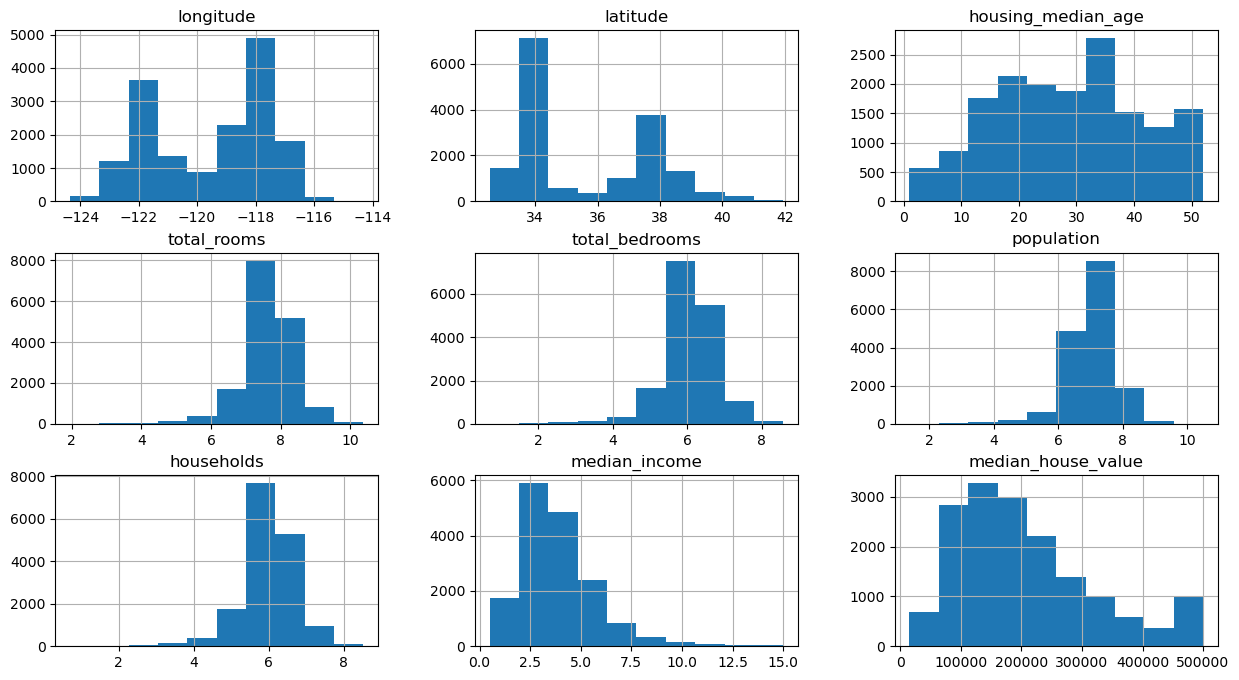

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data.ocean_proximity.value_counts()# done in order to find the number of values represented by each of the variables in ocean_proximity   

ocean_proximity
<1H OCEAN     7250
INLAND        5155
NEAR OCEAN    2129
NEAR BAY      1808
ISLAND           4
Name: count, dtype: int64

In [18]:
#OneHotEncoding the categorical variable
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10549,True,False,False,False,False
1167,False,True,False,False,False
7998,True,False,False,False,False
14178,False,False,False,False,True
6564,False,True,False,False,False
...,...,...,...,...,...
16860,False,False,False,False,True
13391,False,True,False,False,False
12108,False,True,False,False,False
12134,False,True,False,False,False


In [19]:
train_data = z.join(pd.get_dummies(train_data.ocean_proximity))
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10549,-117.77,33.70,4.0,2446.0,622.0,1315.0,560.0,3.7147,137500.0,True,False,False,False,False
1167,-121.56,39.51,46.0,1885.0,385.0,871.0,347.0,1.6352,53100.0,False,True,False,False,False
7998,-118.16,33.85,36.0,1979.0,339.0,952.0,339.0,4.0815,216200.0,True,False,False,False,False
14178,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,False,False,False,False,True
6564,-118.13,34.19,43.0,1621.0,365.0,1015.0,329.0,2.9200,242200.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16860,-122.43,37.63,15.0,2748.0,997.0,1447.0,901.0,3.5214,144200.0,False,False,False,False,True
13391,-117.59,34.09,16.0,2401.0,465.0,1757.0,500.0,3.9755,120400.0,False,True,False,False,False
12108,-117.31,33.97,28.0,3420.0,691.0,1502.0,656.0,3.4896,140300.0,False,True,False,False,False
12134,-117.16,33.92,12.0,3236.0,502.0,1610.0,502.0,4.7568,143500.0,False,True,False,False,False


<Axes: >

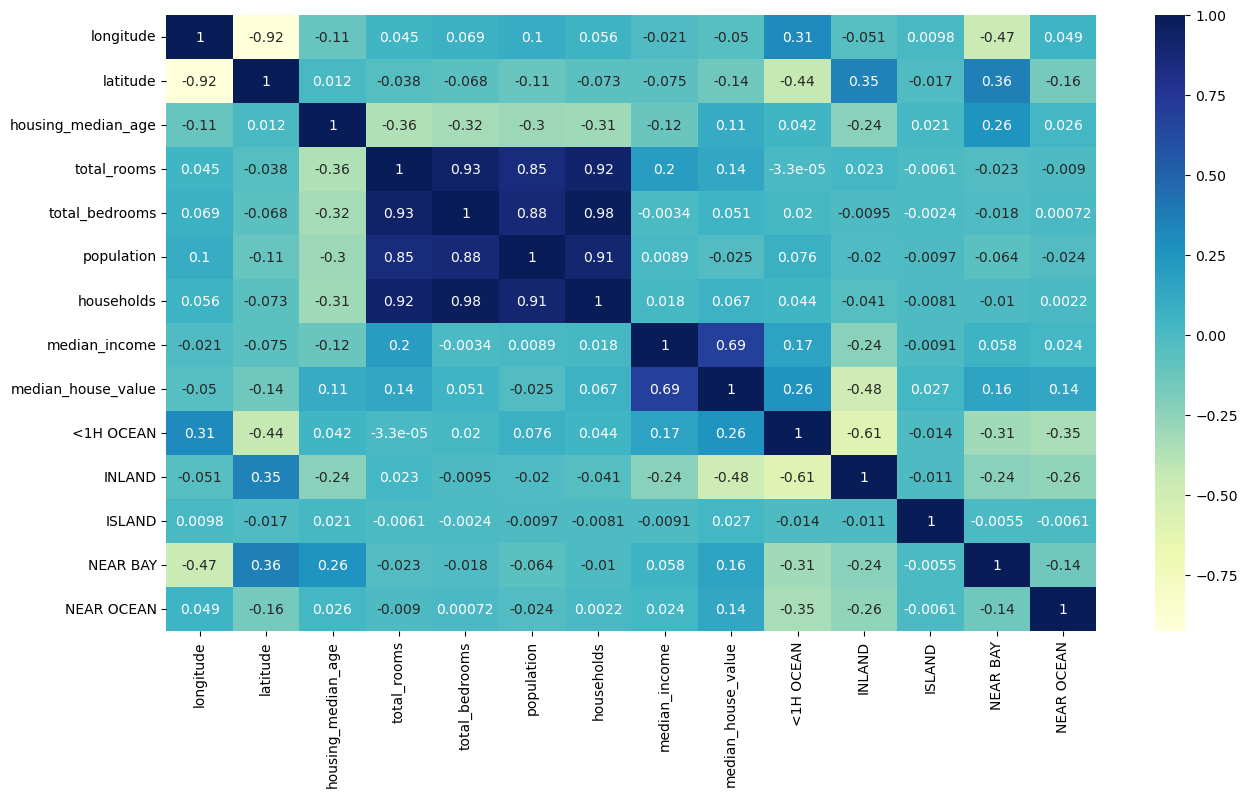

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

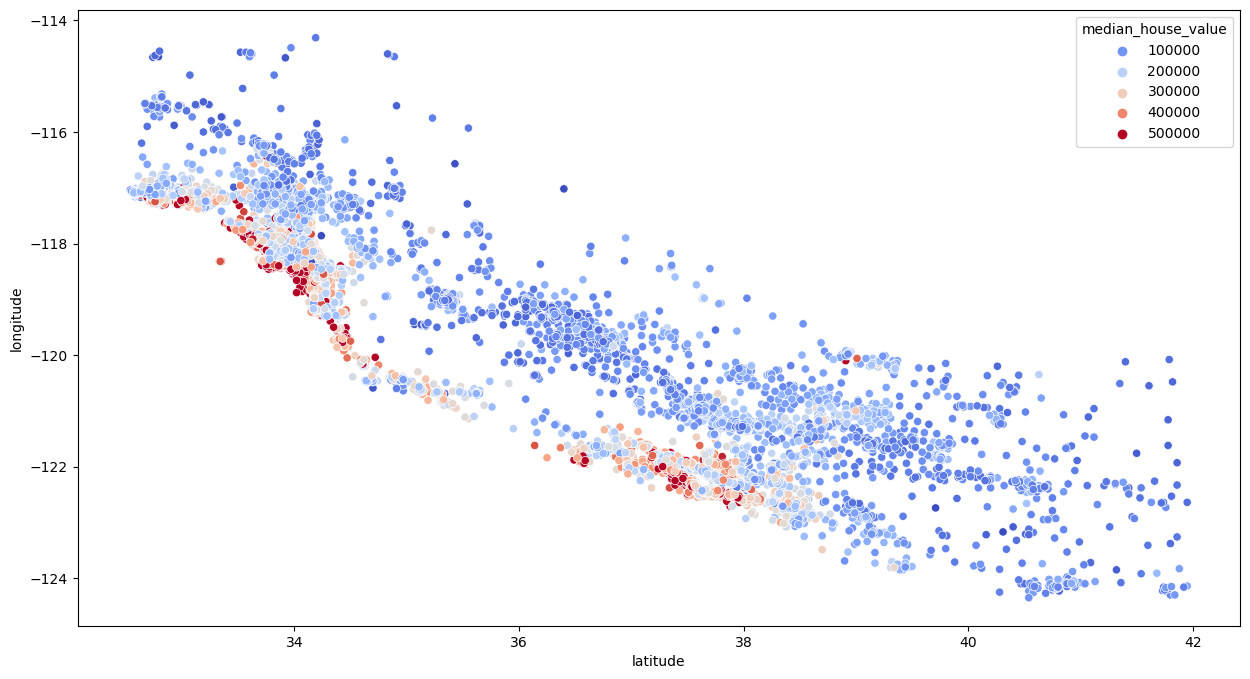

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude" , y = "longitude" , data=train_data , hue="median_house_value" , palette="coolwarm")

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10549,-117.77,33.70,4.0,2446.0,622.0,1315.0,560.0,3.7147,137500.0,True,False,False,False,False
1167,-121.56,39.51,46.0,1885.0,385.0,871.0,347.0,1.6352,53100.0,False,True,False,False,False
7998,-118.16,33.85,36.0,1979.0,339.0,952.0,339.0,4.0815,216200.0,True,False,False,False,False
14178,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,False,False,False,False,True
6564,-118.13,34.19,43.0,1621.0,365.0,1015.0,329.0,2.9200,242200.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16860,-122.43,37.63,15.0,2748.0,997.0,1447.0,901.0,3.5214,144200.0,False,False,False,False,True
13391,-117.59,34.09,16.0,2401.0,465.0,1757.0,500.0,3.9755,120400.0,False,True,False,False,False
12108,-117.31,33.97,28.0,3420.0,691.0,1502.0,656.0,3.4896,140300.0,False,True,False,False,False
12134,-117.16,33.92,12.0,3236.0,502.0,1610.0,502.0,4.7568,143500.0,False,True,False,False,False


In [26]:
#feature engineering

train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

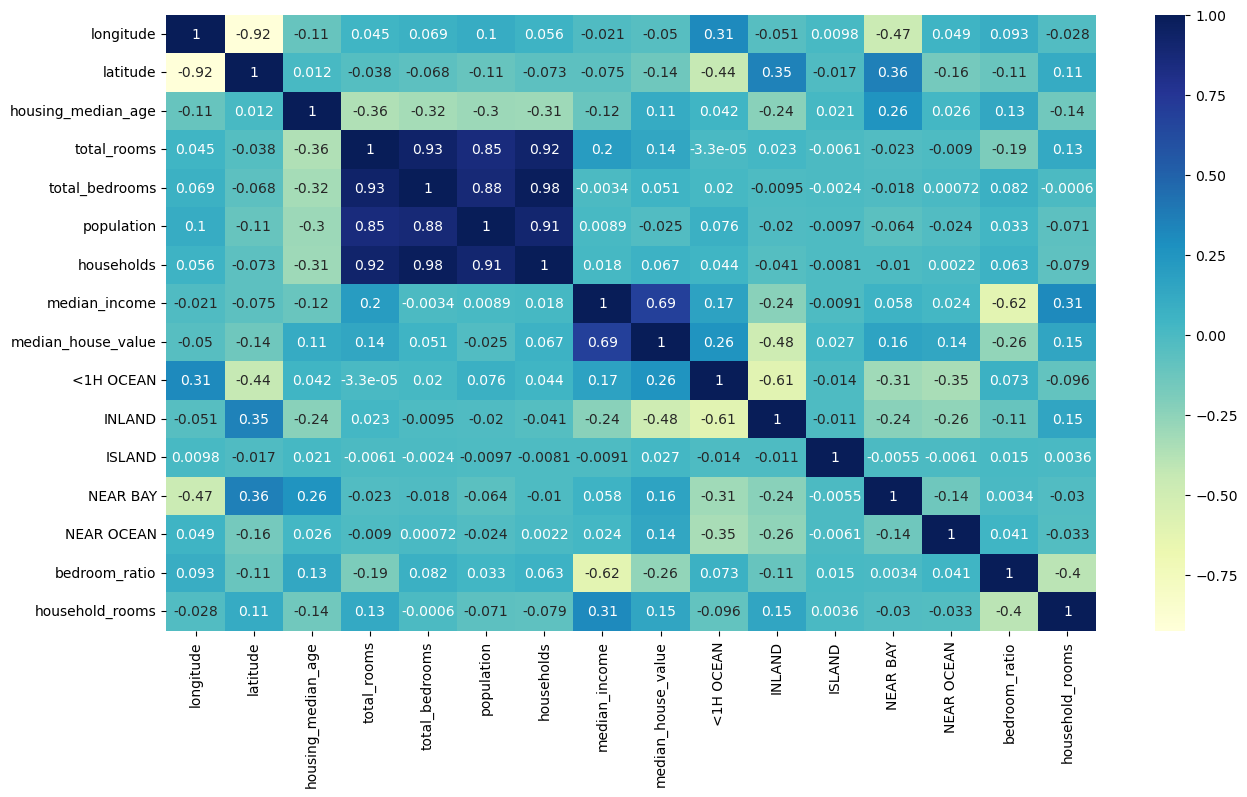

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot= True , cmap="YlGnBu" )

In [29]:
from sklearn.linear_model import LinearRegression
X_train , y_train = train_data.drop(['median_house_value'] , axis = 1) , train_data['median_house_value']
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()